# Analysis of Earth's and Mars' orbits

In this notebook, you will learn about:
- calculating the [distance between two points/objects](#Distance-between-two-points) using the Euclidean distance,
- analysing Earth's and Mars' orbits and [computing the distance between both planets](#Compute-the-distance-between-Earth-and-Mars).

Let's start by importing some basic Python libraries.

In [11]:
import numpy as np

# Distance between two bodies

To compute the distance between two bodies we will use the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance). The equation used to calculate this in two-dimensions (2D) is:
$$
d(p,q) = \sqrt{(p_x-q_x)^2 +(p_y-q_y)^2}
$$
with $d(p,q)$ the Euclidean distance between the two bodies,
$p_x$ the position along the X-axis of body $p$,
$q_x$ the position along the X-axis of body $q$,
$p_y$ the position along the Y-axis of body $p$,
and $q_y$ the position along the Y-axis of body $q$,.

The function below implements this calculation.

In [12]:
def compute_distance_between_two_bodies_in_2D(body1_x_coor, body2_x_coor, body1_y_coor, body2_y_coor):
    
    # Compute the co-linear distance square
    dist_x2 = (body1_x_coor-body2_x_coor)**2
    dist_y2 = (body1_y_coor-body2_y_coor)**2

    # Compute the Euclidean distance between the two bodies
    dist = np.sqrt(dist_x2 +dist_y2)
    
    # Return results
    return dist, np.sqrt(dist_x2), np.sqrt(dist_y2)

Now, use the function defiend above to compute the distance between points:
$$
p = (5,2)
$$
and
$$
q = (3,4)
$$

In [17]:
p_x = 5
p_y = 2
q_x = 3
q_y = 4

#
dist, dist_x, dist_y = compute_distance_between_two_bodies_in_2D(p_x, q_x, p_y, q_y)

# Print result to screen
print("The distance between the points is: {:.3f}.".format(dist))
print("The distances along the X-axis and Y-axis are: {:.3f} and {:.3f}, respectively".format(dist_x, dist_y))

The distance between the points is: 2.828.
The distance along the X-axis and Y-axis are: 2.000 and 2.000, respectively


### Additional material to cover on your own and at your own pace

You might to explore this further by producing a plot:
- that shows the positions of points $p$ and $q$,
- shows a line connecting both points (this line is a graphical representation of the Euclidean distnace),
- shows lines that represnet the distances along the X-axis and Y-axis.

# Compute the distance between Earth and Mars

Now, let's analyse how the distance between Earth and Mars changes over time.

First, we need to implemet the Euclidean distance calculation for the three-dimensional (3D) case. The equation to calculate this is:
$$
d(p,q) = \sqrt{(p_x-q_x)^2 +(p_y-q_y)^2 +(p_z-q_z)^2}
$$
A function below implements this calculation. 

In [18]:
def compute_distance_between_two_bodies_in_3D(body01, body02):
    
    # Extract body 1 orbit's position data
    body1_x_coor = np.array(body01['x'])
    body1_y_coor = np.array(body01['y'])
    body1_z_coor = np.array(body01['z'])
    # Extract body 2 orbit's position data
    body2_x_coor = np.array(body02['x'])
    body2_y_coor = np.array(body02['y'])
    body2_z_coor = np.array(body02['z'])
    #
    dist_x2 = (body1_x_coor-body2_x_coor)**2
    dist_y2 = (body1_y_coor-body2_y_coor)**2
    dist_z2 = (body1_z_coor-body2_z_coor)**2
    
    # Compute the Euclidean distance between the two bodies
    dist = np.sqrt(dist_x2 +dist_y2 +dist_z2)
    
    # Return results
    return dist, np.sqrt(dist_x2), np.sqrt(dist_y2), np.sqrt(dist_z2)

Now, we will use Astroquery's Horizons class to get Earth's and Mars' orbit data.

Let's start by importing the necessary libraries.

In [19]:
# Command to enable interactive Matplotlib plots
%matplotlib notebook
import matplotlib.pyplot as plt
from astroquery.jplhorizons import Horizons
import astropy as astropy
from astropy.time import Time
from datetime import date, timedelta

Now, we need to defien the time range fir the query. Let's request data for an 4 year period.

In [25]:
# Define stop date as today
stop_date = date.today()
# Define time range for query in days
n_years = 4
year_days = 365
days=n_years*year_days

# Compute start date
start_date = (stop_date-timedelta(days)).isoformat()
# Store stop_date in ISO format
stop_date = stop_date.isoformat()
# Define step size
step = '1d'

# Print computed values to screen
print("The query will be set with the following parameters:\
      \n\tstart date = {}, \n\tstop date = {} (today), \n\tand step = {}.".format(start_date,stop_date,step))

The query will be set with the following parameters:      
	start date = 2019-05-17, 
	stop date = 2023-05-16 (today), 
	and step = 1d.


Now, we need to create create a Horizons [instance](https://en.wikipedia.org/wiki/Instance_(computer_science)) to store Earth's and Mars' orbit data.

As a reminder, the minimum required input are __*id*__, __*location*__ and __*epochs*__. Below is an example for Mercury. 

    mercury = Horizons(id=1, # Set id for Mercury
                       location='@sun', # Set observer's location as the Sun
                       epochs={'start': start_date, # Set start, stop and step to previously computed values
                               'stop': stop_date,
                               'step': step})

The identifiers (id) for Earth and Mars are 3 and 4, respectively. Use '@sun' for the location and the time range parameters defined above.

Create the instances for Earth and Mars below.

In [26]:
# Horizons instance to store Earth's data
earth = None # COMPLETE CODE HERE!
# Horizons instance to store Mars' data
mars = None # COMPLETE CODE HERE!

Now, request Earth's and Mars' orbit data by running the __*vectors*__ method.

In [30]:
# Request Earth's orbit data as vectors and store it in mercury_data
earth_data = earth.vectors()
# Request Mars' orbit data as vectors and store it in mercury_data
mars_data = mars.vectors()

# Verify if query was successful
print("Query completed!")
print("Earth's target name is: {}, Mars' target name is: {}".format(earth_data['targetname'][0],mars_data['targetname'][0]))

Query completed!
Earth's target name is: Earth-Moon Barycenter (3), Mars' target name is: Mars Barycenter (4)


Now, use the function defined below (i.e., __*plot_celestial_body_posx_vs_time*__), to plot the evolution over time of Earth's and Mars' orbit along the X-axis.

In [32]:
def plot_celestial_body_posx_vs_time(celestial_body_list, time_range=None):
    
    # Check input data (celestial_body_list) is the right data type
    if type(celestial_body_list) == list:
        for entry in range(0,len(celestial_body_list)):
            if type(celestial_body_list[entry]) != astropy.table.table.Table:
                print("Incorrect input data type, entries in list must be a list of Astropy tables.")
                print("\tCheck entry index: {}".format(entry))
                return
    else:
        print("Incorrect input data type, input must be a list of Astropy tables.")
        return
    
    # Plot data
    plt.figure()
    for elem in range(0,len(celestial_body_list)):
        #
        this_celestial_body = celestial_body_list[elem]
        #
        plt.plot(Time(this_celestial_body['datetime_jd'],format='jd').byear,this_celestial_body['x'],
                 label=this_celestial_body['targetname'][0])
    plt.xlabel("Time [years]")
    plt.ylabel("Object's orbit X position [AU]")
    if time_range:
        plt.xlim(time_range)
    plt.grid()
    plt.legend()
    plt.show()

Using the __*plot_celestial_body_posx_vs_time*__ function, can you reproduce the plot below?
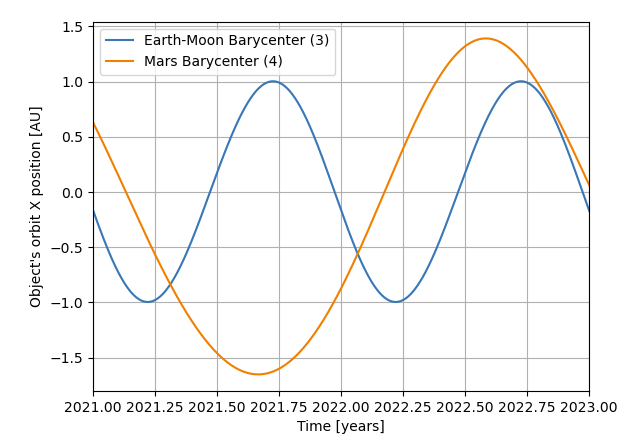

Note: the function requiree two inputs, namely celestial_body_list and time_range.

*celestial_body_list* must be a list of of Astropy tables and can be constructed as follows

    celestial_body_list = [body01, body02]
    
*time_range* must be a time interval list, e.g., *(init_time, end_time)*, where both *init_time* and *end_time* must be numbers/floats and *end_time* must be greater than *init_time*.

In [35]:
# Instruction to produce plot

Now, use the function defined below (i.e., __*plot_celestial_body_orbit_data*__), to plot the orbits of Earth and Mars along the X-axis and Y-axis.

In [38]:
def plot_celestial_body_orbit_data(celestial_body_list):
    
    # Check input data (celestial_body_list) is the right data type
    if type(celestial_body_list) == list:
        for entry in range(0,len(celestial_body_list)):
            if type(celestial_body_list[entry]) != astropy.table.table.Table:
                print("Incorrect input data type, entries in list must be a list of Astropy tables.")
                print("\tCheck entry index: {}".format(entry))
                return
    else:
        print("Incorrect input data type, input must be a list of Astropy tables.")
        return
    
    # Plot data
    plt.figure()
    for elem in range(0,len(celestial_body_list)):
        #
        this_celestial_body = celestial_body_list[elem]
        #
        plt.plot(this_celestial_body['x'],this_celestial_body['y'],label=this_celestial_body['targetname'][0])
    
    plt.axis('equal')
    plt.xlabel("Object's orbit X position [AU]")
    plt.ylabel("Object's orbit Y position [AU]")
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

Lastly, using the __*plot_celestial_body_orbit_data*__ function, can you reproduce the plot below?
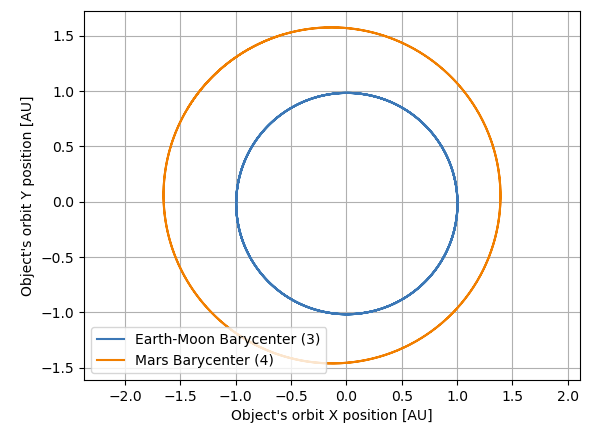

In [40]:
# Instruction to produce plot